# KMeans on Images
- Extracting Dominant Colors
- Color Palette
- Color Gamut
- Image Segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

(1200, 1600, 3)


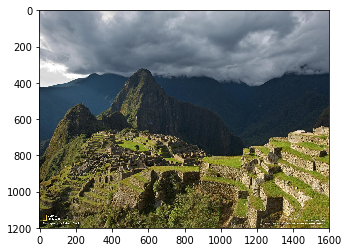

In [2]:
original = cv2.imread('/Users/Pratulya/Desktop/13.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
print(original.shape)
plt.figure()
plt.imshow(original)
plt.show()

In [3]:
im = original.reshape((-1, 3))
im.shape

(1920000, 3)

## Extracting Dominant Colors

In [4]:
k = 8
kmeans = KMeans(k)

In [5]:
kmeans.fit(im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
dominant_colors = kmeans.cluster_centers_.copy().astype('uint8')
dominant_colors.shape

(8, 3)

## Color Palette

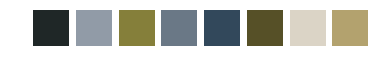

In [7]:
plt.figure("Palette")
plt.title("Dominant Color Palette")

for i,color in enumerate(dominant_colors):
    plt.subplot(1,k,i+1)
    plt.axis("off")
    palette = np.zeros((100,100,3), dtype='uint8')
    palette[:,:,:] = color
    plt.imshow(palette)
plt.show()

## Color Gamut

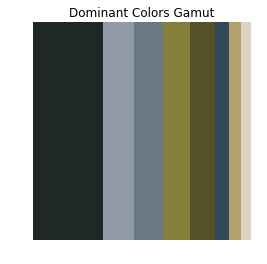

In [8]:
plt.figure("Gamut")
plt.title("Dominant Colors Gamut")
scale = 100 # For Gamut Grid
gamut = np.zeros((k*scale, k*scale, 3), dtype='uint8')

cluster_ids, counts = np.unique(kmeans.labels_, return_counts=True)
counts = counts/im.shape[0] # Fraction
sort_on = counts.argsort()[::-1] # Decreasing Order
cluster_ids = cluster_ids[sort_on]
counts = counts[sort_on] * k * scale # Scaled Fraction

start = 0
for i in range(k-1):
    end = start + int(counts[i])
    gamut[:, start:end, :] = dominant_colors[cluster_ids[i]]
    start = end
gamut[:, start:, :] = dominant_colors[cluster_ids[-1]]

plt.axis("off")
plt.imshow(gamut)
plt.show()

## Image Segmentation

In [9]:
new_img = np.zeros(im.shape, dtype='uint8')
new_img.shape

(1920000, 3)

In [10]:
for i in range(im.shape[0]):
    new_img[i] = dominant_colors[kmeans.labels_[i]]

In [11]:
new_img = new_img.reshape(original.shape)

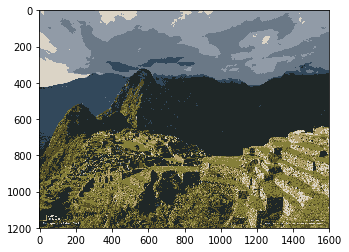

In [12]:
plt.figure()
plt.imshow(new_img)
plt.show()